In [109]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [110]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
combine = [train_df, test_df]

## Data analysis

In [111]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [112]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hippach, Miss. Jean Gertrude",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [115]:
# TO confirm the percentage division for Survived
train_df.describe(percentiles=[.61, .62])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
61%,543.900000,0.000000,3.000000,32.000000,0.000000,0.000000,23.225000
62%,552.800000,1.000000,3.000000,32.000000,0.000000,0.000000,24.150000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [116]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [117]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=False)

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [118]:
pd.crosstab(train_df['Parch'],train_df['Pclass'])

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [119]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch', ascending=False)

,Parch,Survived
6,6,0.000000
5,5,0.200000
4,4,0.000000
3,3,0.600000
2,2,0.500000
1,1,0.550847
0,0,0.343658


In [120]:
pd.crosstab(train_df['SibSp'],train_df['Pclass'])

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [121]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp', ascending=False)

,SibSp,Survived
6,8,0.000000
5,5,0.000000
4,4,0.166667
3,3,0.250000
2,2,0.464286
1,1,0.535885
0,0,0.345395


In [122]:
pd.crosstab(train_df['SibSp'],train_df['Parch'])

Parch,0,1,2,3,4,5,6
SibSp,,,,,,,
0,537,38,29,1,1,2,0
1,123,57,19,3,3,3,1
2,16,7,4,1,0,0,0
3,2,7,7,0,0,0,0
4,0,9,9,0,0,0,0
5,0,0,5,0,0,0,0
8,0,0,7,0,0,0,0


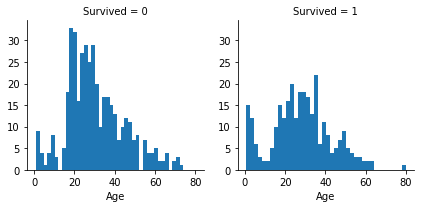

In [123]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=40)

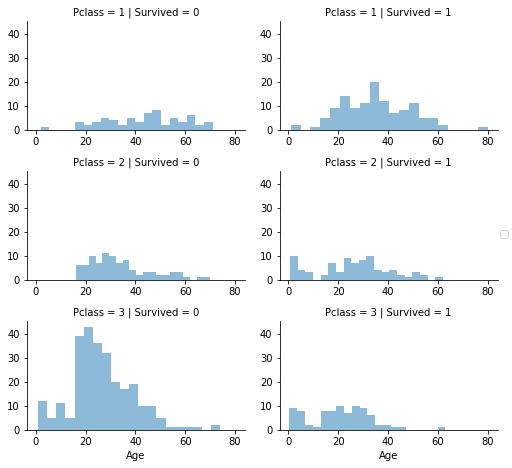

In [124]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
g.map(plt.hist, 'Age', alpha=.5, bins=20)
g.add_legend()

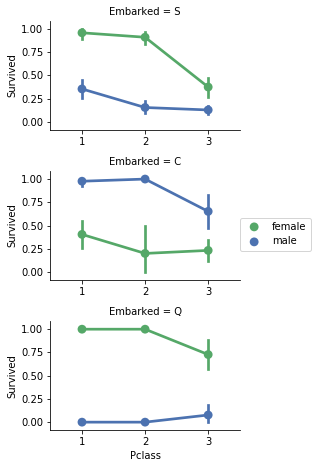

In [125]:
g = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

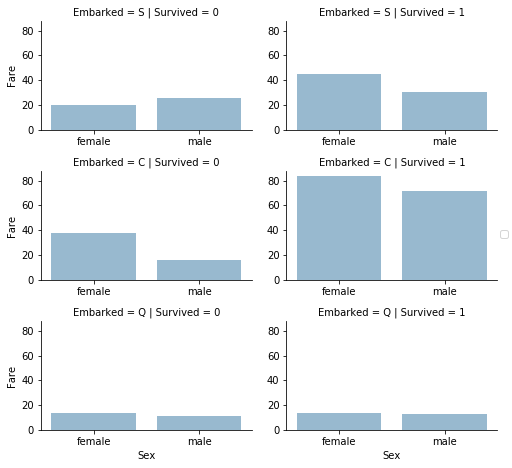

In [126]:
g = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
g.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
g.add_legend()

In [127]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## Data processing

In [128]:
# Drop Cabin and Ticket columns
print(combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Cabin', 'Ticket'], axis=1)
test_df = test_df.drop(['Cabin', 'Ticket'], axis=1)
combine = [train_df, test_df]

combine[0].shape, combine[1].shape

(891, 12) (418, 11)


((891, 10), (418, 9))

In [129]:
combine[0].shape, combine[1].shape

((891, 10), (418, 9))

In [130]:
# Extract titles from Name Column and Create Title Column
for df in combine:
    df['Title'] = df.Name.str.extract('([a-zA-Z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [131]:
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
for df in combine:
    df['Title'].replace(rare_titles, 'Rare', inplace=True)
    df['Title'].replace('Mlle', 'Miss', inplace=True)
    df['Title'].replace('Ms', 'Miss', inplace=True)
    df['Title'].replace('Mme', 'Mrs', inplace=True)
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [132]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for df in combine:
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [133]:
# Drop PassengerId and Name columns
for df in combine:
    df.drop(['PassengerId', 'Name'], axis=1, inplace=True)
train_df.shape, test_df.shape

((891, 9), (418, 8))

In [134]:
for df in combine:
    df['Sex'] = df['Sex'].map({'male':0, 'female': 1}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [135]:
guess_ages = np.zeros((2, 3))

for df in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_ages[i, j] = df[(df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna().median()
            
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[(df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1), 'Age'] = guess_ages[i, j].astype(int)
    
print(train_df.info())
print('-'*40)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 62.7+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
Title       418 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 26.2+ KB
None


In [136]:
# To check age distribution, temporarily create AgeBand
train_df['AgeBand'] = pd.cut(train_df.Age, 5)
train_df[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [137]:
for df in combine:
    df.loc[df.Age <= 16, 'Age'] = 0
    df.loc[(df.Age > 16) & (df.Age <= 32), 'Age'] = 1
    df.loc[(df.Age > 32) & (df.Age <= 48), 'Age'] = 2
    df.loc[(df.Age > 48) & (df.Age <= 64), 'Age'] = 3
    df.loc[df.Age > 64, 'Age'] = 4
    df.Age = df.Age.astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.252, 48.168]"


In [138]:
train_df.drop('AgeBand', axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [139]:
# Combine Parch and SibSp
for df in combine:
    df['FamilySize'] = df.Parch + df.SibSp + 1
train_df.head()
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [140]:
# Check the survival rate between passengers with family and without
for df in combine:
    df['IsAlone'] = 0
    df.loc[df.FamilySize == 1, 'IsAlone'] = 1
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [141]:
for df in combine:
    df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [142]:
for df in combine:
    df["Age*Pclass"] = df.Age * df.Pclass

train_df.loc[:, ["Age*Pclass", "Age", "Pclass"]].head()

,Age*Pclass,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


In [143]:
# As Embarked has 2 nulls
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
Fare          891 non-null float64
Embarked      889 non-null object
Title         891 non-null int64
IsAlone       891 non-null int64
Age*Pclass    891 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 62.7+ KB


In [144]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [145]:
# Fill the 2 nulls with the most frequent values
for df in combine:
    df.Embarked = df.Embarked.fillna(freq_port)
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [146]:
for df in combine:
    df.Embarked = df.Embarked.map({'S':0, 'C':1, 'Q':2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [147]:
# Fare is missing a single data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null int64
Fare          417 non-null float64
Embarked      418 non-null int64
Title         418 non-null int64
IsAlone       418 non-null int64
Age*Pclass    418 non-null int64
dtypes: float64(1), int64(7)
memory usage: 26.2 KB


In [148]:
freq_fare = test_df.Fare.dropna().median()
freq_fare

14.4542

In [149]:
# Fill the single null with the median
test_df.Fare.fillna(freq_fare, inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null int64
Fare          418 non-null float64
Embarked      418 non-null int64
Title         418 non-null int64
IsAlone       418 non-null int64
Age*Pclass    418 non-null int64
dtypes: float64(1), int64(7)
memory usage: 26.2 KB


In [150]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [151]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [152]:
test_df.head(10)

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3
5,3,0,0,1,0,1,1,0
6,3,1,1,0,2,2,1,3
7,2,0,1,2,0,1,0,2
8,3,1,1,0,1,3,1,3
9,3,0,1,2,0,1,0,3


In [153]:
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']
X_test = test_df
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [161]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train)*100, 2)
acc_log

81.260000000000005

In [157]:
coeff_df = pd.DataFrame(train_df.columns.delete(0)) # Delete the index 0 of dataframe column list
coeff_df.columns = ["Feature"]
coeff_df["Correlation"] = pd.DataFrame(logreg.coef_[0])
coeff_df.sort_values(by="Correlation", ascending=False), logreg.intercept_

(      Feature  Correlation
 1         Sex     2.202084
 5       Title     0.413861
 4    Embarked     0.281311
 6     IsAlone     0.260866
 3        Fare    -0.022573
 7  Age*Pclass    -0.084929
 2         Age    -0.372168
 0      Pclass    -1.084958, array([ 0.82257522]))

In [164]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train)*100, 2)
acc_svc
svc.decision_function(X_test)

array([-1.13323288, -1.00030005, -1.18603617, -1.00011897, -0.01952892,
       -1.03615868,  1.00001944, -1.11958215,  1.16900463, -1.32466197,
       -0.99965963, -0.88873733,  1.51148426, -1.0185883 ,  1.66845502,
        1.63829065, -1.22113412, -1.00014603, -0.27210738, -0.78720454,
       -1.00007331,  1.22955048,  1.67007179, -0.85127706,  1.8641975 ,
       -0.98409711,  1.24177238, -1.00014603, -0.88873733, -1.17092049,
       -1.0185883 , -1.22923942, -1.00021491, -0.50396211, -0.85127706,
       -1.00014603,  0.0620344 ,  0.0620344 , -1.00011897, -0.91864718,
       -1.23872689, -0.88873733, -1.00003592,  1.28737367,  1.66845502,
       -1.00011897, -0.97965207, -0.99970195,  1.83731006, -1.00021491,
       -0.99958548, -0.99994323,  0.623265  ,  1.00003787, -0.99994323,
       -0.63175947, -1.00003592, -0.99965963, -1.32466197,  1.15747312,
       -0.99965963, -0.99961885, -0.99965963,  1.00001944,  0.83578005,
        1.13606622,  1.00001944, -0.9999794 , -0.80894482,  1.85